# Definitions

Correlation is a measure of association between measured (random) variables. The Pearson's correlation coefficient quantifies the strength of this association on a simple scale: it varies between -1 and 1. The larger the absolute value of this correlation coefficient, the tighter the correlation and more predictive it is. The smaller the absolute value, the weaker the correlation and less predictive. Positive values imply a positive correlation: as I eat more ice cream, my weight goes up. Negative values imply a negative correlation: as I eat more ice cream, my weight goes down (wouldn't that be great!). 

The Pearson's correlation coefficient is called parametric because it assumes a parametric form of the distributions of the two random variables, $X$ and $Y$; specifically, that both variables are [normally distributed](https://colab.research.google.com/drive/1-KxH3FCq5rDyyO33HXxewIv-kKldkINi?usp=sharing).

# Computing for a population

When you have full knowledge of the joint distribution of $𝑋$ and $Y$ (e.g., when working with an idealized model, not with real, finite data sets), the Pearson's correlation coefficient is typically denoted as $\rho$ and computed in terms of the covariance between the two variables, normalized by the product of their individual standard deviations:

$\quad\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_x\sigma_y}$

where

$\quad cov(X,Y)=E\left [ (X-\mu_X)(Y-\mu_Y)\right ]$

in which $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, respectively, and $E\left[\right]$ denotes expected value.

# Computing for a sample

When working with real data, you have a [sample, not a population](https://colab.research.google.com/drive/1SnVM1MPaFvMSjlDLyihgeZ25OAk-k4Nk?usp=sharing), and thus need to compute the correlation coefficient (typically denoted as *r*) using sample statistics.

## Sample Pearson's correlation coefficient

$\quad r_{X,Y}=\frac{\sum^n_{i-1}{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum^n_{i-1}{(x_i-\bar{x})^2}}\sqrt{\sum^n_{i-1}{(y_i-\bar{y})^2}}}$

where

$\quad \bar{x}=\frac{1}{n}\sum^n_{i=1}{x_i,\bar{y}}=\frac{1}{n}\sum^n_{i=1}{y_i}$

are the sample means.

## Coefficient of determination

It is possible to compute $r_{X,Y}$ not just when $X$ and $Y$ are two random variables, but also when one is a random (dependent) variable (typically $Y$) and the other is an independent or explanatory variable (typically $X$). In this case, the square of the correlation coefficient ($r^2$) quantifies the total variation in one variable ($Y$) that is explained by the regression line with respect to the other variable ($X$). This quantity is called the **coefficient of determination** and is often referred to as the fraction of explained variance

## Standard error of the sample Pearson's correlation coefficient

The standard error of the sample *r* is computed by assuming that r follows a [Student's t distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing) with two degrees of freedom (because of the two variables):

$\quad s_r=\sqrt{\frac{1-r^2}{n-2}}$

Note that "standard error" refers in general to the standard deviation of a statistical estimate, which here is *r*. It is not the same thing as the "standard error of the mean", which refers to the standard deviation of a statistical estimate of a mean.

## Confidence intervals for the sample Pearson's correlation coefficient

This is a bit tricker to compute, because r is not normally distributed, particularly around the extreme values (e.g., around 1, the distribution cannot go higher than one but can take many values <1). We therefore need to do the following (a good explanation is [here](http://faculty.washington.edu/gloftus/P317-318/Useful_Information/r_to_z/PearsonrCIs.pdf)):

1\. Take the Fisher's z-transformation of r:

$\quad z=0.5\times ln(\frac{1+r}{1-r})$

2\. Compute its standard deviation as:

$\quad s_z=\sqrt{\frac{1}{n-3}}$

3\. Compute confidence intervals in this z-space as we have shown [here](https://colab.research.google.com/drive/1rdJMusMZDTaM9OGsyt27tCVkSasmRj2O?usp=sharing), as: 

$\quad z \pm (z\:criterion) \times s_z$

where the *z* criterion is determined from the desired confidence value using a [z-score calculator](http://www.z-table.com) or [norminv](https://www.mathworks.com/help/stats/norminv.html) in Matlab.

4\. Then translate each *z* value back to *r* as:

$\quad r=\frac{e^{2z}-1}{e^{2z}+1}$


## Hypothesis testing on the sample Pearson's correlation coefficient

For $H_0: r=0$. Here we are considering a null distribution that is centered at *r*=0. In this case, we know that the distribution of *r* around that mean is symmetric, and the sample mean follows follows a [Student's *t* distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing).  Therefore, our test statistic is simply the *t* statistic, which we compute as the residual (with respect to zero) of *r* divided by its standard error:

$\quad t=\frac{r}{s_r}$

with $n-2$ degrees of freedom.

For $H_0: r=r_s,\:where\:r_s\ne 0$. Here we are considering null distributions that are not centered at $r=0$ and therefore are not symmetric and do not follow a *t* distribution. We therefore first compute the *z* transformation of $r$ and $r_s$, as above. Now our test statistic is:

$\quad \lambda =\frac{z_r-z_{rs}}{\sqrt{\frac{1}{n-3}}}$

with $n-2$ degrees of freedom.



# Exercises

Let's examine the relationship between these two measured variables:

Wing length | Tail length
--- | ---
10.4 | 7.4
10.8 | 7.6
11.1 | 7.9
10.2 | 7.2
10.3 | 7.4
10.2 | 7.1
10.7 | 7.4
10.5 | 7.2
10.8 | 7.8
11.2 | 7.7
10.6 | 7.8
11.4 | 8.3

Assume Wing length is the $X$ variable and Tail Length is the $Y$ variable, both measured in cm.

Answers to the questions below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

##### 1\. Plot X vs Y. Do they look related?

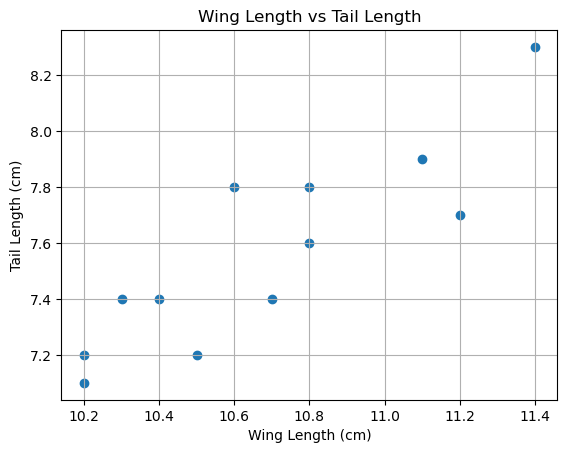

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
Y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

plt.scatter(X, Y)
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')
plt.title('Wing Length vs Tail Length')
plt.grid(True)
plt.show()

They do indeed appear to be related.

##### 2\. Calculate $r_{X,Y}$ and $r_{Y,X}$, first using the equations above and then using either the Python numpy funciton [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or Matlab's built-in [corrcoef](https://www.mathworks.com/help/matlab/ref/corrcoef.html). Did you get the same answers?

In [47]:
def pearson_correlation(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2)) * np.sqrt(np.sum((y - mean_y)**2))
    
    return numerator / denominator

r_XY = pearson_correlation(X, Y)
r_YX = pearson_correlation(Y, X)
print(f"Manual-r_XY: {r_XY}, r_YX: {r_YX}")

# Using numpy's corrcoef
r_matrix = np.corrcoef(X, Y)
r_XY_np = r_matrix[0, 1]
r_YX_np = r_matrix[1, 0]
print(f"Numpy-r_XY: {r_XY_np}, r_YX: {r_YX_np}")

Manual-r_XY: 0.8703545613058227, r_YX: 0.8703545613058227
Numpy-r_XY: 0.8703545613058227, r_YX: 0.8703545613058227


The manual and numpy calculations yield the same results


##### 3\. What is the standard error of $r_{X,Y}$? The 95% confidence intervals computed from the standard error?

In [48]:
def standard_error_r(r, n):
    return np.sqrt((1 - r**2) / (n - 2))

def fisher_z_transform(r):
    return 0.5 * np.log((1 + r) / (1 - r))

def inverse_fisher_z(z):
    return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

def confidence_intervals_r(r, n, confidence=0.95):
    z = fisher_z_transform(r)
    s_z = np.sqrt(1 / (n - 3))
    z_crit = stats.norm.ppf((1 - confidence) / 2)
    z_lower = z + (z_crit * s_z)
    z_upper = z - (z_crit * s_z)
    r_lower = inverse_fisher_z(z_lower)
    r_upper = inverse_fisher_z(z_upper)
    return r_lower, r_upper

n = len(X)
s_r = standard_error_r(r_XY, n)
ci_lower, ci_upper = confidence_intervals_r(r_XY, n)
print(f"Standard Error of r_XY: {s_r}")
print(f"95% Confidence Intervals for r_XY: ({ci_lower}, {ci_upper})")

Standard Error of r_XY: 0.15571863652567375
95% Confidence Intervals for r_XY: (0.5923110780844787, 0.9631598602746105)


##### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [49]:
t_statistic = r_XY / s_r
df = n - 2
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=df))
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: 5.589276792584329, p-value: 0.00023110594312059085


The value of $r_{X,Y}$ is significant at the p<0.05 level.

##### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [50]:
yale_r = 0.75
z_r = fisher_z_transform(r_XY)
z_yale_r = fisher_z_transform(yale_r)
lambda_statistic = (z_r - z_yale_r) / np.sqrt(1 / (n - 3))
p_value_yale = 2 * (1 - stats.norm.cdf(abs(lambda_statistic)))
print(f"Lambda statistic: {lambda_statistic}, p-value: {p_value_yale}")

Lambda statistic: 1.0847547271784326, p-value: 0.2780303018608832


##### 6\. Finally, calculate the statistical power and sample size needed to reject $H_0:r=0\:when\:r\ge 0.5$.

In [51]:
def find_power(r, n, alpha=0.05):
    z_r = fisher_z_transform(r)
    s_z = np.sqrt(1 / (n - 3))
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = (z_r - z_alpha * s_z) / s_z
    power = stats.norm.cdf(z_beta)
    return power
    #github copilot walked me through calculating beta

def find_sample_size(r, power=0.99, alpha=0.05):
    z_r = fisher_z_transform(r)
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(power)
    n = (z_alpha + z_beta)**2 / (z_r**2) + 3
    return int(np.ceil(n))
    #note this function basically inverts the find_power function ppf is the inverse of cdf
    #github copilot helped me with the algebra solving for n

obs_r = r_XY
theoretical_r = 0.5
power = find_power(obs_r, n)
required_n = find_sample_size(theoretical_r)
print(f"Statistical Power: {power}")
print(f"Required Sample Size to reject H0: r=0, with an assumed sample r >= 0.5 with 99% power: {required_n}")


Statistical Power: 0.9795062269088841
Required Sample Size to reject H0: r=0, with an assumed sample r >= 0.5 with 99% power: 64


# Additional Resources


- Differences between correlation and regression are discussed [here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) and [here](http://www.biostathandbook.com/linearregression.html).

- A reference on [how to choose the appropriate measure of association](https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006) (Khamis 2008).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania